In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing 
from nltk.corpus import stopwords
import re # https://docs.python.org/3/library/re.html

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dipta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dipta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [215]:
import warnings

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
x = pd.read_csv('data_reviews/x_train.csv')
y = pd.read_csv('data_reviews/y_train.csv')
xtest = pd.read_csv('data_reviews/x_test.csv')
# tr_text_list = x['text'].values.tolist()
# for text in tr_text_list:
#     print(text)

df = pd.concat([x,y], axis=1)

In [3]:
def stop_lema(str_input):
    words = re.sub(r"[^A-Za-z]", " ", str_input).lower().split()
    
    # remove stops using nltk
    #
    # NOTE: for demo purposes only! You may well find 
    # that the nltk version of 'english' has issues similar
    # to the version found in sklearn; you may want to use
    # your own custom list of stop-words instead
#     stops = stopwords.words('english')
    words = [w for w in words if w not in stop]
    
    # stem the remaining words after removing stops; 
    # what happens if we do this *before* removing stops?
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    
    return words

In [5]:
stop = ['the', 'and', 'a', 'i', 'is', 'to', 'of', 'this', 'was', 'it', 'in', 'for', 'that', 'with', 'my', 'very', 'on', 'you', 'but', 'have', 'are',  'an', 'just'
       ,'if', 'we', "it's", 'they', 'there', 'really', 'from','has', 'about', 'your', 'even', 'only', 'or', 'when', 'what', 'he', 'go', 'because'
       ,'which', 'some', 'up', 'how', 'who', 'our', 'after','their', 'me', 'did', 'its', 'see', 'still',  'battery','got', 'am',  'does', 'them', 'two', 'going'
       , '&', 'look', 'plot', 'story','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 
        'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
        'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
        'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after']

### N_grams

In [273]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=stop_lema, ngram_range=(1,2))
x_train = tfidf_vectorizer.fit_transform(x.text)
x_test = tfidf_vectorizer.transform(xtest.text)
# pd.DataFrame(x.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [99]:
tfidf_vectorizer2 = TfidfVectorizer(tokenizer=stop_lema, ngram_range=(1,2))
x_train2 = tfidf_vectorizer2.fit_transform(x.text)
x_test2 = tfidf_vectorizer2.transform(xtest.text)
# pd.DataFrame(x.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [66]:
len(tfidf_vectorizer.get_feature_names())

16175

In [67]:
x_test = tfidf_vectorizer.transform(xtest.text)

In [68]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train, y)
lr_pred = lr.predict(x_train)
lr.score(x_train, y)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9725

In [69]:
yproba1_test = lr.predict_proba(x_test)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

In [93]:
iterr = []
acc = []
logloss = []
coef_pix000 = []

for i in range(1, 41):
    iterr.append(i)
    log = LogisticRegression(max_iter = i)
    log.fit(x_train, y)
    acc.append(log.score(x_train, y))
    y_pred = log.predict(x_train)
    logloss.append(log_loss(y, y_pred))
    coef_pix000.append(log.coef_[0][0])
    
df_log_loss = pd.DataFrame(
    {
        'Iteration': iterr,
        'Accuracy': acc,
        'LogLoss': logloss,
        'Coef_Pix000': coef_pix000
    }
)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

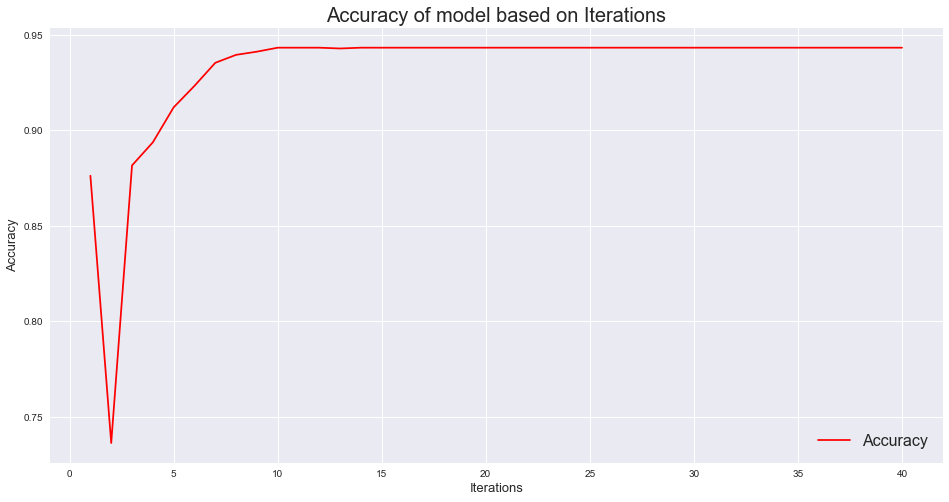

In [94]:
plt.figure(figsize = (16,8))
plt.plot(df_log_loss.Iteration,df_log_loss.Accuracy, label='Accuracy',color='red')
# plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')
# plt.ylim([0.0, 1.0])
plt.xlabel('Iterations', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('Accuracy of model based on Iterations', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [104]:
iterr = []
acc = []
logloss = []
coef_pix000 = []

for i in range(1, 41):
    iterr.append(i)
    log = LogisticRegression(max_iter = i)
    log.fit(x_train2, y)
    acc.append(log.score(x_train2, y))
    y_pred = log.predict(x_train2)
    logloss.append(log_loss(y, y_pred))
    coef_pix000.append(log.coef_[0][0])
    
df_log_loss = pd.DataFrame(
    {
        'Iteration': iterr,
        'Accuracy': acc,
        'LogLoss': logloss,
        'Coef_Pix000': coef_pix000
    }
)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


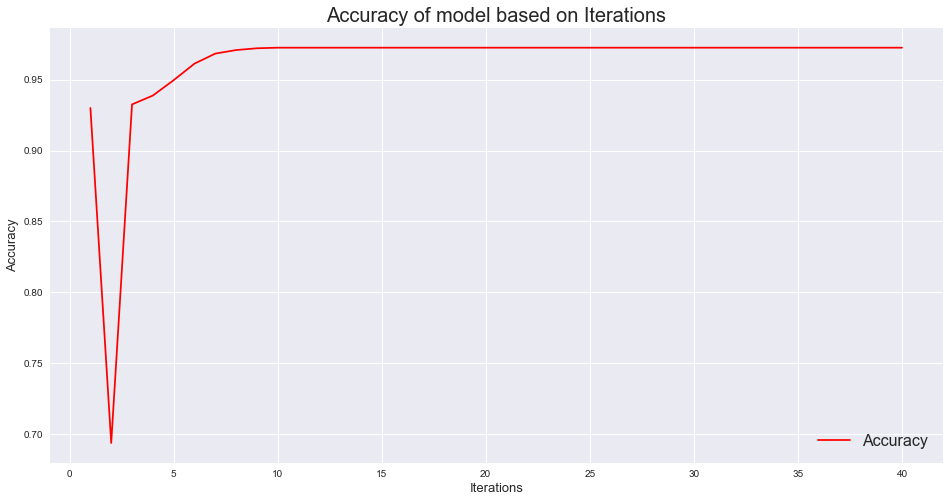

In [105]:
plt.figure(figsize = (16,8))
plt.plot(df_log_loss.Iteration,df_log_loss.Accuracy, label='Accuracy',color='red')
# plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')
# plt.ylim([0.0, 1.0])
plt.xlabel('Iterations', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('Accuracy of model based on Iterations', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [106]:
lr = LogisticRegression(max_iter = 10)
lr.fit(x_train, y)
lr_pred = lr.predict(x_train)
print(lr.score(x_train, y))
yproba1_test = lr.predict_proba(x_test)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

0.9433333333333334


C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
lr = LogisticRegression(max_iter = 10)
lr.fit(x_train2, y)
lr_pred = lr.predict(x_train2)
lr.score(x_train2, y)
yproba1_test = lr.predict_proba(x_test2)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
C_grid = np.logspace(-9, 6, 31)
logloss_c = []
train_acc = []
# test_acc = []

for c in C_grid:
    log_reg = LogisticRegression(C=c)
    log_reg.fit(x_train, y)
    y_pred = log_reg.predict(x_train)
    train_acc.append(log_reg.score(x_train, y))
#     test_acc.append(log_reg.score(X_test, y_test))
    logloss_c.append(log_loss(y, y_pred))
    
df_c = pd.DataFrame(
    {
        'C': C_grid,
        'LogLoss': logloss_c,
        'Training_Accuracy': train_acc
#         'Testing Accuracy': test_acc
    }
)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [111]:
C_grid

array([1.00000000e-09, 3.16227766e-09, 1.00000000e-08, 3.16227766e-08,
       1.00000000e-07, 3.16227766e-07, 1.00000000e-06, 3.16227766e-06,
       1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06])

In [87]:
yproba1_test = log_reg.predict_proba(x_test)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

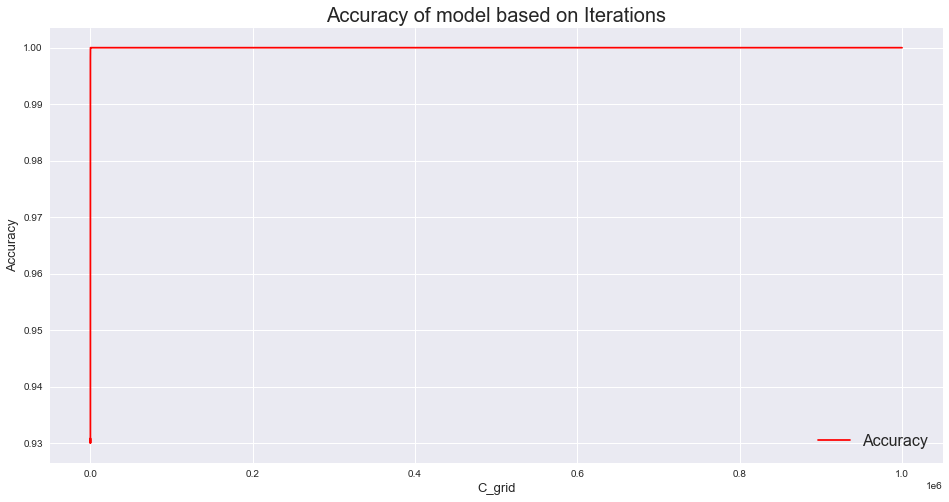

In [86]:
plt.figure(figsize = (16,8))
plt.plot(df_c.C,df_c.Training_Accuracy, label='Accuracy',color='red')
# plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')
# plt.ylim([0.0, 1.0])
plt.xlabel('C_grid', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('Accuracy of model based on Iterations', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [117]:
kf = KFold(n_splits=5)
lr2 = LogisticRegression(max_iter = 10)
scores = cross_val_score(lr2, x_train, y, cv=kf)

scores

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

array([0.42083333, 0.59791667, 0.79375   , 0.625     , 0.36875   ])

In [134]:
lr10 = LogisticRegression()
distributions = dict(C=np.logspace(-9, 6, 31))
clf2 = GridSearchCV(lr10, distributions, cv=3, n_jobs=-1)
search2 = clf2.fit(x_train, y)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [127]:
search2.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_max_iter', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [160]:
search2.best_params_

{'C': 3.1622776601683795}

In [157]:
df_c = pd.DataFrame(
    {
        'C': search2.cv_results_['param_C'].data,
        'mean_accuracy': search2.cv_results_['mean_test_score'],
        'std_dev': search2.cv_results_['std_test_score'],
        'Split1' : search2.cv_results_['split0_test_score'],
        'Split2' : search2.cv_results_['split1_test_score'],
        'Split3' : search2.cv_results_['split2_test_score']
    }
)

In [139]:
search2.cv_results_['std_test_score']

array([0.02411633, 0.02411633, 0.02411633, 0.02411633, 0.02411633,
       0.02411633, 0.02411633, 0.02321398, 0.02321398, 0.02406588,
       0.02450198, 0.02296586, 0.04472524, 0.04247548, 0.04306407,
       0.04157072, 0.04098187, 0.03509412, 0.03242513, 0.02979677,
       0.02951577, 0.0237244 , 0.02256934, 0.01974666, 0.01582236,
       0.00831247, 0.00615201, 0.00482327, 0.00311805, 0.00256851,
       0.0035843 ])

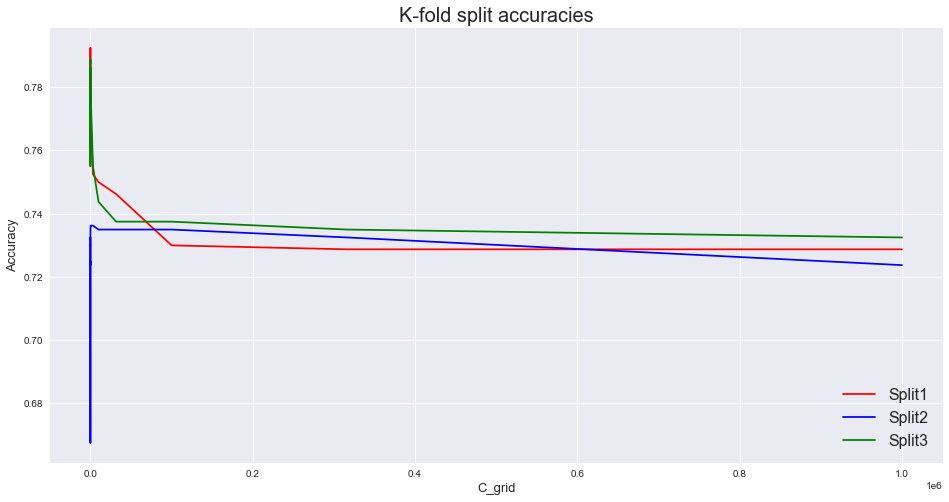

In [159]:
plt.figure(figsize = (16,8))
plt.plot(df_c.C,df_c.Split1, label='Split1',color='red')
plt.plot(df_c.C,df_c.Split2, label='Split2',color='blue')
plt.plot(df_c.C,df_c.Split3, label='Split3',color='green')
# plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')
# plt.ylim([0.0, 1.0])
plt.xlabel('C_grid', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('K-fold split accuracies', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

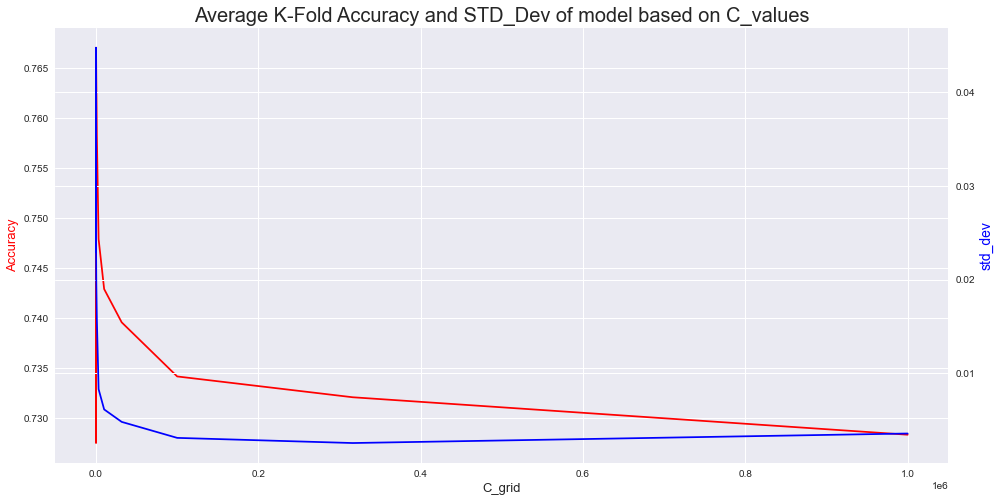

In [155]:
fig,ax = plt.subplots(figsize=(16,8))

# make a plot
ax.plot(df_c.C,df_c.mean_accuracy, label='Accuracy',color='red')
# set x-axis label
ax.set_xlabel('C_grid', fontsize=13)
# set y-axis label
ax.set_ylabel('Accuracy', fontsize=13, color='red')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_c.C,df_c.std_dev, label='std_dev',color='blue')
ax2.set_ylabel("std_dev",color="blue",fontsize=14)
plt.title('Average K-Fold Accuracy and STD_Dev of model based on C_values', fontsize=20)
plt.show()

In [162]:
lr = LogisticRegression(max_iter = 10, C=3.1622776601683795)
lr.fit(x_train, y)
lr_pred = lr.predict(x_train)
print(lr.score(x_train, y))
yproba1_test = lr.predict_proba(x_test)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

0.99125


C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# MLP

In [174]:
network = MLPClassifier(hidden_layer_sizes=((10,)), max_iter=400, random_state=13)
network.fit(x_train, y)
predictions = network.predict(x_test)
yproba1_test = network.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [175]:
print(network.score(x_train, y))

1.0


In [182]:
mlp = MLPClassifier()
distributions = {'hidden_layer_sizes': [(5,), (10,), (20,), (30,), (50,)]}
clf2 = GridSearchCV(mlp, distributions, cv=3, n_jobs=-1, verbose=1)
search2 = clf2.fit(x_train, y)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.0min finished
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [183]:
search2.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_hidden_layer_sizes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [187]:
df_c = pd.DataFrame(
    {
        'hidden_layer_size': search2.cv_results_['param_hidden_layer_sizes'].data,
        'mean_accuracy': search2.cv_results_['mean_test_score'],
        'std_dev': search2.cv_results_['std_test_score'],
        'Split1' : search2.cv_results_['split0_test_score'],
        'Split2' : search2.cv_results_['split1_test_score'],
        'Split3' : search2.cv_results_['split2_test_score']
    }
)

In [194]:
df_c['hidden_layer_size']= df_c.hidden_layer_size.apply(lambda x: str(x))

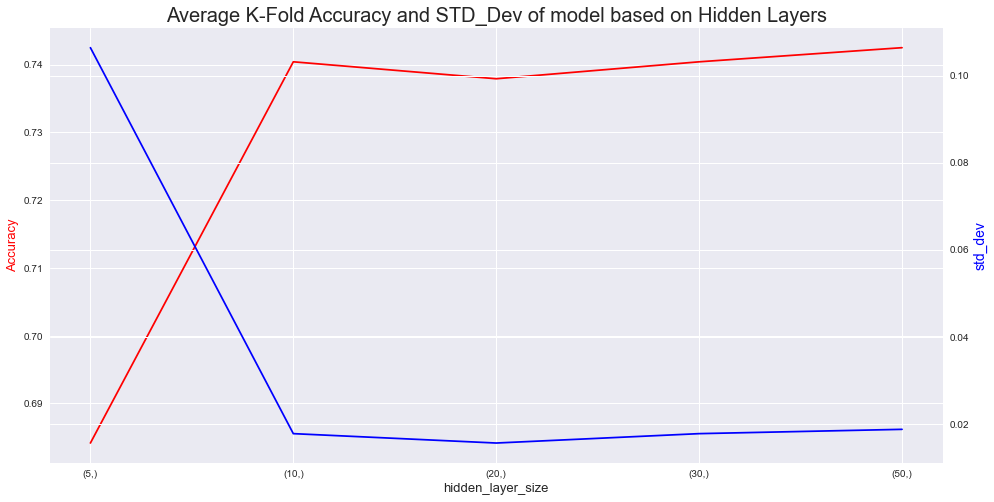

In [197]:
fig,ax = plt.subplots(figsize=(16,8))

# make a plot
ax.plot(df_c.hidden_layer_size,df_c.mean_accuracy, label='Accuracy',color='red')
# set x-axis label
ax.set_xlabel('hidden_layer_size', fontsize=13)
# set y-axis label
ax.set_ylabel('Accuracy', fontsize=13, color='red')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_c.hidden_layer_size,df_c.std_dev, label='std_dev',color='blue')
ax2.set_ylabel("std_dev",color="blue",fontsize=14)
plt.title('Average K-Fold Accuracy and STD_Dev of model based on Hidden Layers', fontsize=20)
plt.show()

In [185]:
search2.best_params_

{'hidden_layer_sizes': (50,)}

In [198]:
network = MLPClassifier(hidden_layer_sizes=((50,)), max_iter=400, random_state=13)
network.fit(x_train, y)
predictions = network.predict(x_test)
yproba1_test = network.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [199]:
print(network.score(x_train, y))

1.0


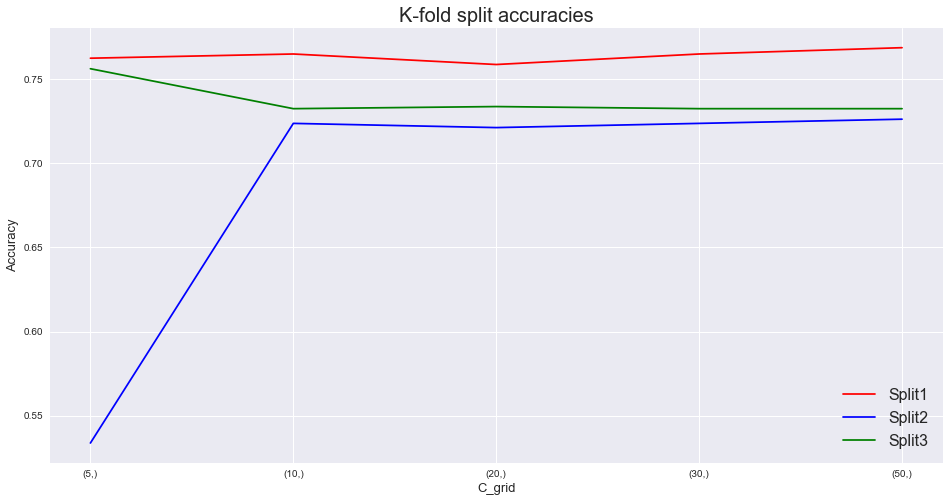

In [201]:
plt.figure(figsize = (16,8))
plt.plot(df_c.hidden_layer_size,df_c.Split1, label='Split1',color='red')
plt.plot(df_c.hidden_layer_size,df_c.Split2, label='Split2',color='blue')
plt.plot(df_c.hidden_layer_size,df_c.Split3, label='Split3',color='green')
# plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')
# plt.ylim([0.0, 1.0])
plt.xlabel('C_grid', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('K-fold split accuracies', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [203]:
mlp = MLPClassifier(hidden_layer_sizes=((50,)))
distributions = {'alpha': 10.0 ** -np.arange(-2, 2)}
clf2 = GridSearchCV(mlp, distributions, cv=3, n_jobs=-1, verbose=1)
search2 = clf2.fit(x_train, y)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  3.7min remaining:   44.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.8min finished
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [204]:
search2.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [206]:
search2.best_params_

{'alpha': 1.0}

In [205]:
df_c = pd.DataFrame(
    {
        'alpha': search2.cv_results_['param_alpha'].data,
        'mean_accuracy': search2.cv_results_['mean_test_score'],
        'std_dev': search2.cv_results_['std_test_score'],
        'Split1' : search2.cv_results_['split0_test_score'],
        'Split2' : search2.cv_results_['split1_test_score'],
        'Split3' : search2.cv_results_['split2_test_score']
    }
)

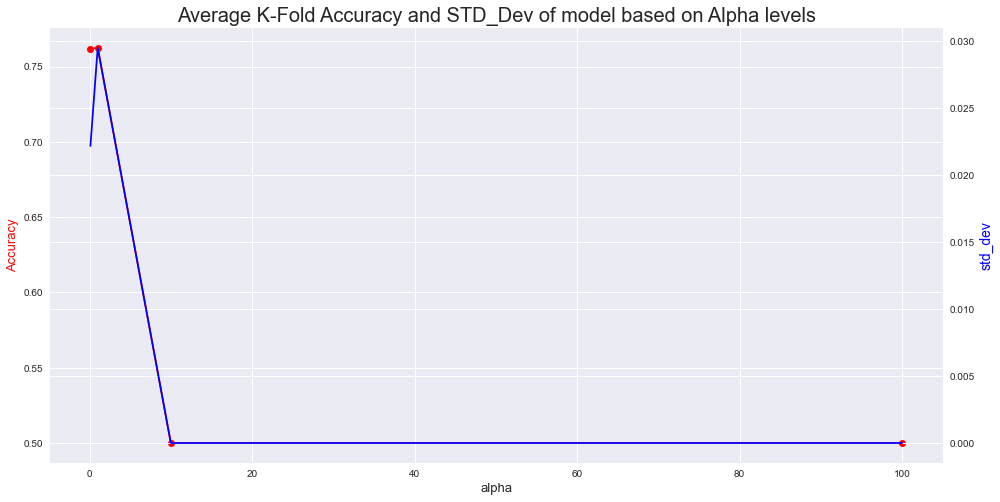

In [214]:
fig,ax = plt.subplots(figsize=(16,8))

# make a plot
ax.plot(df_c.alpha,df_c.mean_accuracy, label='Accuracy',color='red', marker='o')
# set x-axis label
ax.set_xlabel('alpha', fontsize=13)
# set y-axis label
ax.set_ylabel('Accuracy', fontsize=13, color='red')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_c.alpha,df_c.std_dev, label='std_dev',color='blue')
ax2.set_ylabel("std_dev",color="blue",fontsize=14)
plt.title('Average K-Fold Accuracy and STD_Dev of model based on Alpha levels', fontsize=20)
plt.show()

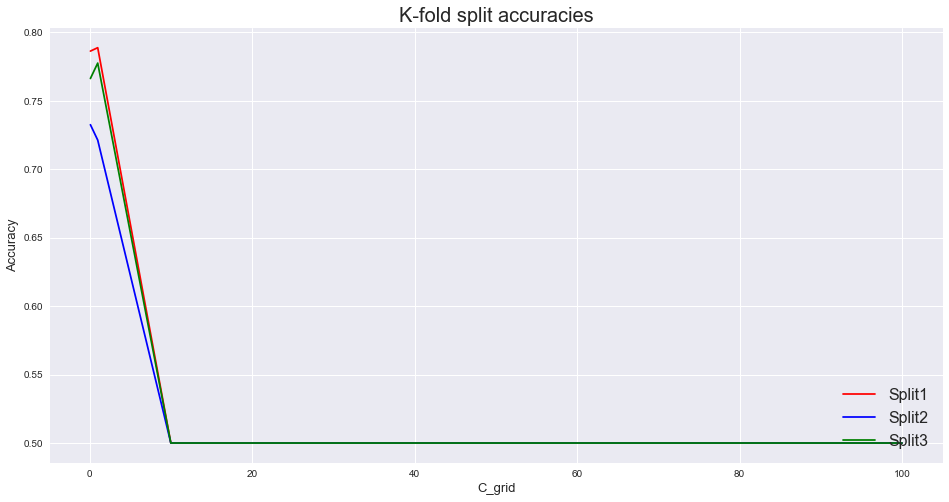

In [212]:
plt.figure(figsize = (16,8))
plt.plot(df_c.alpha,df_c.Split1, label='Split1',color='red')
plt.plot(df_c.alpha,df_c.Split2, label='Split2',color='blue')
plt.plot(df_c.alpha,df_c.Split3, label='Split3',color='green')
# plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')
# plt.ylim([0.0, 1.0])
plt.xlabel('C_grid', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('K-fold split accuracies', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [213]:
network = MLPClassifier(hidden_layer_sizes=((50,)), alpha= 1.0, max_iter=400, random_state=13)
network.fit(x_train, y)
predictions = network.predict(x_test)
yproba1_test = network.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Random Forest

In [222]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y)
predictions = rfc.predict(x_test)
yproba1_test = rfc.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

<ipython-input-222-5e82eda0eda3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y)


In [223]:
print(rfc.score(x_train, y))

0.99


In [261]:
x_train.shape

(2400, 12152)

In [263]:
import math 

In [285]:
param_grid = { 
    'n_estimators': [480, 490, 500, 530, 550, 600],
    'criterion': ['entropy'],
    'max_features': [12152]
}

In [286]:
rfc = RandomForestClassifier()
rfc = GridSearchCV(rfc, param_grid, cv=3, n_jobs=-1, verbose=2)
search2 = rfc.fit(x_train, y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  4.8min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.1min finished
C:\Users\Dipta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [288]:
search2.best_params_

{'criterion': 'entropy', 'max_features': 12152, 'n_estimators': 530}

In [289]:
search2.best_score_

0.69375

In [287]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 20, n_estimators= 470)
rfc.fit(x_train, y)
predictions = rfc.predict(x_test)
yproba1_test = rfc.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

<ipython-input-287-f0c27101a8bb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y)


In [290]:
search2.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [291]:
df_c = pd.DataFrame(
    {
        'n_estimators': search2.cv_results_['param_n_estimators'].data,
        'mean_accuracy': search2.cv_results_['mean_test_score'],
        'std_dev': search2.cv_results_['std_test_score'],
        'Split1' : search2.cv_results_['split0_test_score'],
        'Split2' : search2.cv_results_['split1_test_score'],
        'Split3' : search2.cv_results_['split2_test_score']
    }
)

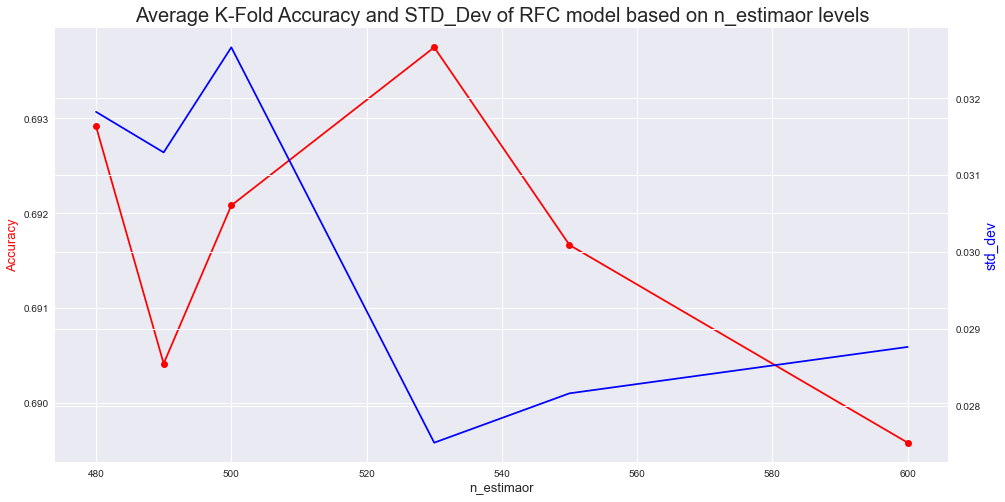

In [297]:
fig,ax = plt.subplots(figsize=(16,8))

# make a plot
ax.plot(df_c.n_estimators,df_c.mean_accuracy, label='Accuracy',color='red', marker='o')
# set x-axis label
ax.set_xlabel('n_estimaor', fontsize=13)
# set y-axis label
ax.set_ylabel('Accuracy', fontsize=13, color='red')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_c.n_estimators,df_c.std_dev, label='std_dev',color='blue')
ax2.set_ylabel("std_dev",color="blue",fontsize=14)
plt.title('Average K-Fold Accuracy and STD_Dev of RFC model based on n_estimaor levels', fontsize=20)
plt.show()

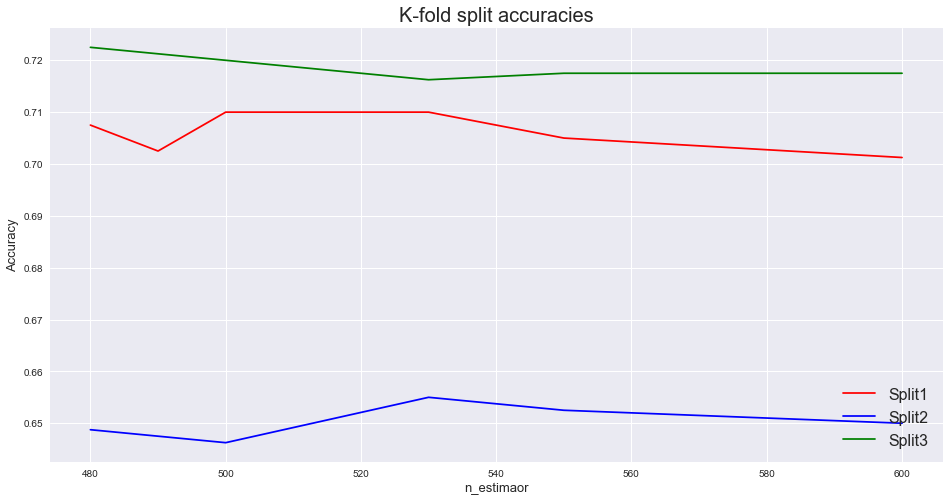

In [298]:
plt.figure(figsize = (16,8))
plt.plot(df_c.n_estimators,df_c.Split1, label='Split1',color='red')
plt.plot(df_c.n_estimators,df_c.Split2, label='Split2',color='blue')
plt.plot(df_c.n_estimators,df_c.Split3, label='Split3',color='green')
# plt.plot(df.Iteration, df.LogLoss, label='LogLoss',color='green')
# plt.ylim([0.0, 1.0])
plt.xlabel('n_estimaor', fontsize=13)
plt.ylabel('Accuracy', fontsize=13)
plt.title('K-fold split accuracies', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [300]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 12152, n_estimators= 800)
rfc.fit(x_train, y)
predictions = rfc.predict(x_test)
yproba1_test = rfc.predict_proba(x_test)[:,1]
np.savetxt('yproba1_test.txt', yproba1_test)

<ipython-input-300-4357c80ea6b6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y)


In [301]:
rfc.score(x_train, y)

1.0